<a href="https://colab.research.google.com/github/harunpirim/graph-data-science-course/blob/main/04_graph_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Visualization Techniques

This notebook demonstrates various graph visualization techniques using NetworkX, Matplotlib, and Plotly.

## Learning Objectives
- Understand different layout algorithms
- Create effective visualizations
- Customize graph appearance
- Analyze visual patterns

In [1]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

## 1. Basic Graph Visualization

Let's start with basic graph visualization techniques.

Graph: 34 nodes, 78 edges


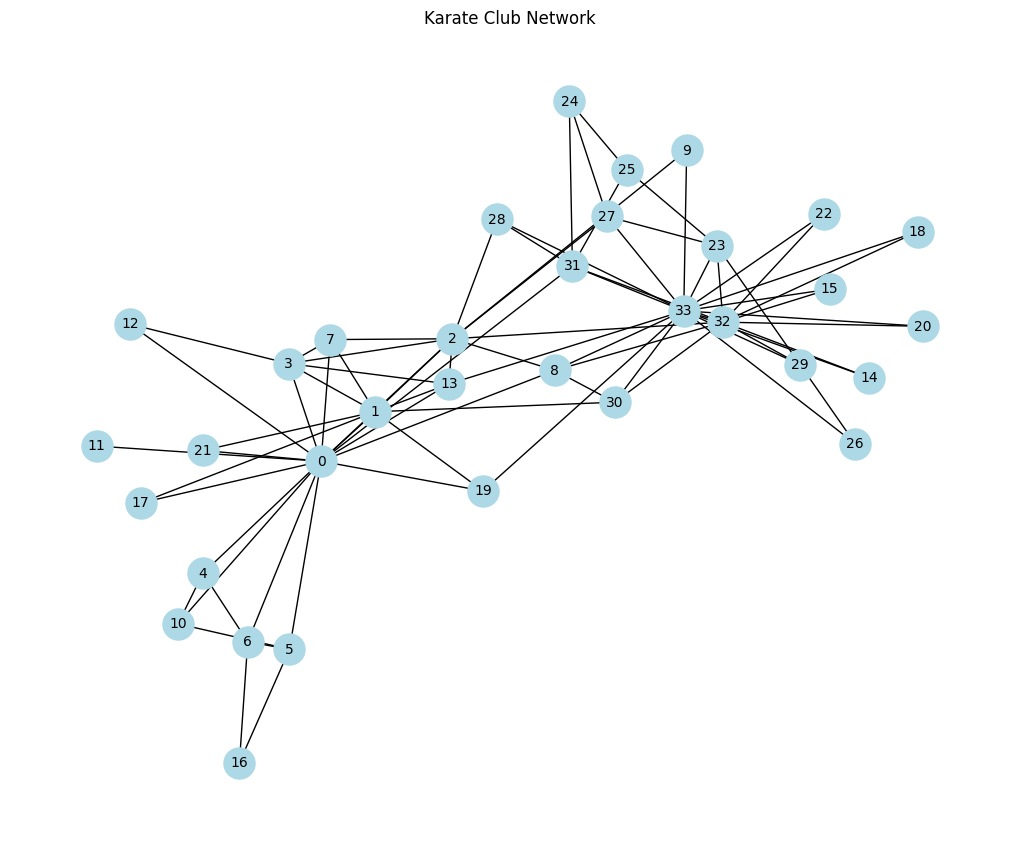

In [2]:
# Create a sample graph
G = nx.karate_club_graph()
print(f"Graph: {G.number_of_nodes()} nodes, {G.number_of_edges()} edges")

# Basic visualization
plt.figure(figsize=(10, 8))
nx.draw(G, with_labels=True, node_color='lightblue', node_size=500, font_size=10)
plt.title('Karate Club Network')
plt.show()

## 2. Layout Algorithms

Explore different layout algorithms for graph visualization.

In [ ]:
# Compare different layouts
layouts = {
    'spring': nx.spring_layout,
    'circular': nx.circular_layout,
    'random': nx.random_layout,
    'shell': nx.shell_layout
}

fig, axes = plt.subplots(2, 2, figsize=(15, 12))
axes = axes.ravel()

for i, (name, layout_func) in enumerate(layouts.items()):
    pos = layout_func(G)
    nx.draw(G, pos, ax=axes[i], with_labels=True, node_color='lightgreen',
            node_size=300, font_size=8)
    axes[i].set_title(f'{name.title()} Layout')

plt.tight_layout()
plt.show()

## 3. Interactive Visualization with Plotly

Create interactive visualizations using Plotly.

In [ ]:
# Create interactive visualization
pos = nx.spring_layout(G)

# Extract node positions
node_x = [pos[node][0] for node in G.nodes()]
node_y = [pos[node][1] for node in G.nodes()]

# Create edge traces
edge_x, edge_y = [], []
for edge in G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Create the interactive plot
fig = go.Figure()

# Add edges
fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines',
                        line=dict(width=0.5, color='#888'), hoverinfo='none'))

# Add nodes
fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers+text',
                        marker=dict(size=10, color='lightblue'),
                        text=list(G.nodes()), textposition="middle center",
                        hoverinfo='text'))

fig.update_layout(title='Interactive Karate Club Network',
                  showlegend=False, hovermode='closest')
fig.show()

## 4. Creating a Social Network with Rich Attributes

Let's create a realistic social network with 15 people, including 10 node features and 5 edge features, and save it as GraphML for Gephi.


In [5]:
import random
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px

def create_social_network():
    """Create a social network with 15 people and realistic features."""

    # Set random seed for reproducibility
    np.random.seed(42)

    # Create an undirected graph
    G = nx.Graph()

    # Add 15 people as nodes
    people = [f"Person_{i+1:02d}" for i in range(15)]
    G.add_nodes_from(people)

    # Define node features (10 features)
    node_features = {
        'age': [random.randint(18, 65) for _ in range(15)],
        'gender': random.choices(['Male', 'Female'], weights=[0.5, 0.5], k=15),
        'education': random.choices(['High School', 'Bachelor', 'Master', 'PhD'],
                                  weights=[0.2, 0.4, 0.3, 0.1], k=15),
        'income_level': random.choices(['Low', 'Medium', 'High'], weights=[0.3, 0.5, 0.2], k=15),
        'city': random.choices(['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix'], k=15),
        'profession': random.choices(['Engineer', 'Teacher', 'Doctor', 'Artist', 'Manager', 'Student'], k=15),
        'marital_status': random.choices(['Single', 'Married', 'Divorced'], weights=[0.4, 0.5, 0.1], k=15),
        'hobbies': random.choices(['Sports', 'Music', 'Reading', 'Gaming', 'Travel'], k=15),
        'social_media_usage': random.choices(['Low', 'Medium', 'High'], weights=[0.2, 0.5, 0.3], k=15),
        'personality_type': random.choices(['Introvert', 'Extrovert', 'Ambivert'],
                                         weights=[0.3, 0.3, 0.4], k=15)
    }

    # Add node features to the graph
    for i, person in enumerate(people):
        for feature, values in node_features.items():
            G.nodes[person][feature] = values[i]

    # Create edges with some realistic social network structure
    # Start with a few core connections
    core_connections = [
        (0, 1), (0, 2), (1, 2),  # Core group
        (3, 4), (3, 5), (4, 5),  # Another group
        (6, 7), (6, 8), (7, 8),  # Third group
    ]

    # Add some inter-group connections
    inter_connections = [
        (0, 3), (1, 4), (2, 5),  # Connect groups
        (3, 6), (4, 7), (5, 8),  # More connections
    ]

    # Add some random connections
    random_connections = []
    for _ in range(8):  # Add 8 more random edges
        u, v = random.sample(range(15), 2)
        if (u, v) not in core_connections and (v, u) not in core_connections:
            random_connections.append((u, v))

    all_edges = core_connections + inter_connections + random_connections

    # Define edge features (5 features)
    edge_features = {
        'relationship_type': random.choices(['Friend', 'Family', 'Colleague', 'Acquaintance'],
                                          weights=[0.5, 0.2, 0.2, 0.1], k=len(all_edges)),
        'strength': [round(random.uniform(0.1, 1.0), 2) for _ in range(len(all_edges))],
        'duration_years': [round(random.uniform(0.5, 10.0), 1) for _ in range(len(all_edges))],
        'interaction_frequency': random.choices(['Daily', 'Weekly', 'Monthly', 'Rarely'],
                                              weights=[0.2, 0.4, 0.3, 0.1], k=len(all_edges)),
        'communication_type': random.choices(['In-person', 'Online', 'Mixed'],
                                           weights=[0.4, 0.3, 0.3], k=len(all_edges))
    }

    # Add edges with features
    for i, (u, v) in enumerate(all_edges):
        person_u = people[u]
        person_v = people[v]
        G.add_edge(person_u, person_v)

        # Add edge features
        for feature, values in edge_features.items():
            G.edges[person_u, person_v][feature] = values[i]

    return G

In [6]:
# Create the social network
social_G = create_social_network()

# Print network statistics
print(f"Network Statistics:")
print(f"Number of nodes: {social_G.number_of_nodes()}")
print(f"Number of edges: {social_G.number_of_edges()}")
print(f"Average degree: {sum(dict(social_G.degree()).values()) / social_G.number_of_nodes():.2f}")
print(f"Network density: {nx.density(social_G):.3f}")

# Print node features
if social_G.nodes():
    node_attrs = list(next(iter(social_G.nodes(data=True)))[1].keys())
    print(f"\nNode features: {node_attrs}")

# Print edge features
if social_G.edges():
    edge_attrs = list(next(iter(social_G.edges(data=True)))[2].keys())
    print(f"Edge features: {edge_attrs}")


Network Statistics:
Number of nodes: 15
Number of edges: 22
Average degree: 2.93
Network density: 0.210

Node features: ['age', 'gender', 'education', 'income_level', 'city', 'profession', 'marital_status', 'hobbies', 'social_media_usage', 'personality_type']
Edge features: ['relationship_type', 'strength', 'duration_years', 'interaction_frequency', 'communication_type']


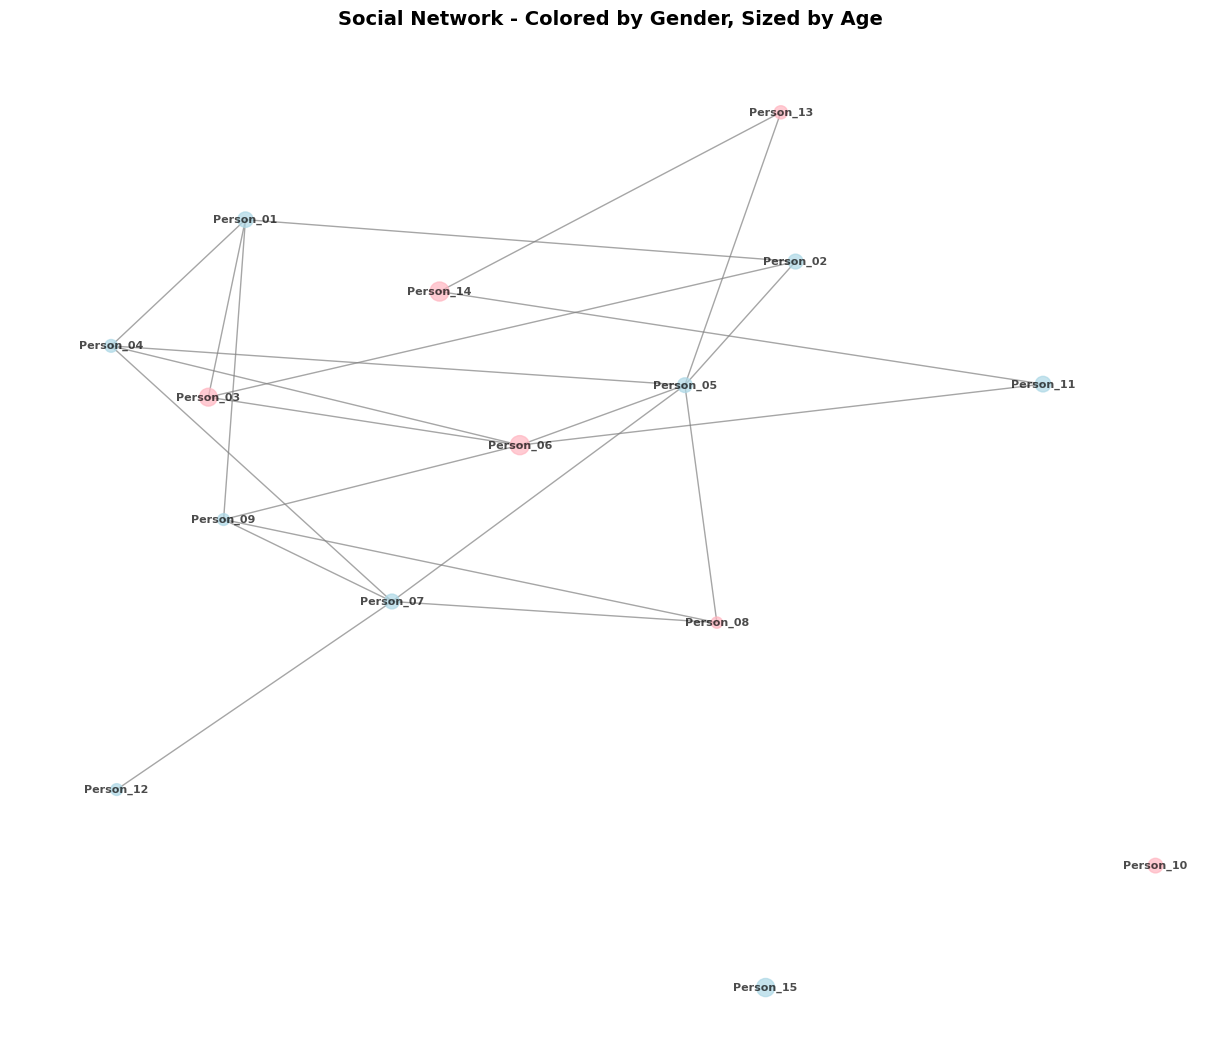

In [7]:
# Visualize the social network
plt.figure(figsize=(12, 10))
pos = nx.spring_layout(social_G, k=1, iterations=50)

# Color nodes by gender
gender_colors = {'Male': 'lightblue', 'Female': 'lightpink'}
node_colors = [gender_colors.get(social_G.nodes[node]['gender'], 'gray') for node in social_G.nodes()]

# Size nodes by age
node_sizes = [social_G.nodes[node]['age'] * 3 for node in social_G.nodes()]

# Draw the network
nx.draw(social_G, pos,
        node_color=node_colors,
        node_size=node_sizes,
        with_labels=True,
        font_size=8,
        font_weight='bold',
        edge_color='gray',
        alpha=0.7)

plt.title('Social Network - Colored by Gender, Sized by Age', fontsize=14, fontweight='bold')
plt.show()


In [8]:
# Save to GraphML format for Gephi
import random

def save_to_graphml(G, filename):
    """Save the graph to GraphML format for Gephi."""
    # Convert node and edge attributes to strings for GraphML compatibility
    G_copy = G.copy()

    # Ensure all attributes are strings or numbers
    for node in G_copy.nodes():
        for attr, value in G_copy.nodes[node].items():
            if not isinstance(value, (str, int, float)):
                G_copy.nodes[node][attr] = str(value)

    for edge in G_copy.edges():
        for attr, value in G_copy.edges[edge].items():
            if not isinstance(value, (str, int, float)):
                G_copy.edges[edge][attr] = str(value)

    # Write to GraphML
    nx.write_graphml(G_copy, filename)
    print(f"Graph saved to {filename}")
    print(f"Nodes: {G_copy.number_of_nodes()}")
    print(f"Edges: {G_copy.number_of_edges()}")

# Save the social network
filename = "social_network_15_people.graphml"
save_to_graphml(social_G, filename)


Graph saved to social_network_15_people.graphml
Nodes: 15
Edges: 22


In [9]:
# Display sample data
print("Sample node data:")
sample_node = list(social_G.nodes(data=True))[0]
print(f"Node: {sample_node[0]}")
for attr, value in sample_node[1].items():
    print(f"  {attr}: {value}")

print("\nSample edge data:")
if social_G.edges():
    sample_edge = list(social_G.edges(data=True))[0]
    print(f"Edge: {sample_edge[0]} - {sample_edge[1]}")
    for attr, value in sample_edge[2].items():
        print(f"  {attr}: {value}")


Sample node data:
Node: Person_01
  age: 41
  gender: Male
  education: Bachelor
  income_level: Medium
  city: Houston
  profession: Artist
  marital_status: Single
  hobbies: Travel
  social_media_usage: Low
  personality_type: Ambivert

Sample edge data:
Edge: Person_01 - Person_02
  relationship_type: Friend
  strength: 0.45
  duration_years: 0.5
  interaction_frequency: Rarely
  communication_type: Online


## 5. Interactive Social Network Visualization

Create an interactive visualization of the social network using Plotly.


In [10]:
# Create interactive visualization of the social network
pos = nx.spring_layout(social_G, k=1, iterations=50)

# Extract node positions
node_x = [pos[node][0] for node in social_G.nodes()]
node_y = [pos[node][1] for node in social_G.nodes()]

# Create edge traces
edge_x, edge_y = [], []
for edge in social_G.edges():
    x0, y0 = pos[edge[0]]
    x1, y1 = pos[edge[1]]
    edge_x.extend([x0, x1, None])
    edge_y.extend([y0, y1, None])

# Create hover text for nodes
hover_text = []
for node in social_G.nodes():
    attrs = social_G.nodes[node]
    text = f"<b>{node}</b><br>"
    text += f"Age: {attrs['age']}<br>"
    text += f"Gender: {attrs['gender']}<br>"
    text += f"Education: {attrs['education']}<br>"
    text += f"Profession: {attrs['profession']}<br>"
    text += f"City: {attrs['city']}"
    hover_text.append(text)

# Create the interactive plot
fig = go.Figure()

# Add edges
fig.add_trace(go.Scatter(x=edge_x, y=edge_y, mode='lines',
                        line=dict(width=1, color='#888'), hoverinfo='none'))

# Add nodes
fig.add_trace(go.Scatter(x=node_x, y=node_y, mode='markers+text',
                        marker=dict(size=20, color='lightblue'),
                        text=list(social_G.nodes()),
                        textposition="middle center",
                        hovertext=hover_text,
                        hoverinfo='text',
                        name='People'))

fig.update_layout(title='Interactive Social Network - 15 People',
                  showlegend=False,
                  hovermode='closest',
                  width=800, height=600)
fig.show()
